## <center> Comparison of Classification Techniques for Distributed Denial of Service Attack Detection <center>

## <center> Chris Arseniou 2730 - Anastasia Psarou 2860 <center>

### <center> Preprocessing <center>

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import warnings

df = pd.read_csv('attacks.csv')

C:\Users\chris\anaconda4\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\chris\anaconda4\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\chris\AppData\Local\Temp\ipykernel_9420\466447542.py:13: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('attacks.csv')


In [2]:
df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,SimillarHTTP,Inbound,Label
0,870,2908,17,1,2,0,422.0,0.0,211.0,211.0,...,422,0,0,-1,-1,1,-1,0,1,NetBIOS
1,871,53796,17,48,2,0,530.0,0.0,265.0,265.0,...,530,0,0,-1,-1,1,-1,0,1,NetBIOS
2,648,40660,17,1,2,0,458.0,0.0,229.0,229.0,...,458,0,0,-1,-1,1,-1,0,1,NetBIOS
3,872,54308,17,1,2,0,458.0,0.0,229.0,229.0,...,458,0,0,-1,-1,1,-1,0,1,NetBIOS
4,873,40653,17,1,2,0,458.0,0.0,229.0,229.0,...,458,0,0,-1,-1,1,-1,0,1,NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,35407,51458,17,217711,6,0,2088.0,0.0,393.0,321.0,...,2088,0,0,-1,-1,5,20,0,1,UDP
139996,38223,3380,17,105314,4,0,1398.0,0.0,369.0,330.0,...,1398,0,0,-1,-1,3,20,0,1,UDP
139997,52718,34267,17,2,2,0,750.0,0.0,375.0,375.0,...,750,0,0,-1,-1,1,32,0,1,UDP
139998,38221,24969,17,106963,4,0,1398.0,0.0,369.0,330.0,...,1398,0,0,-1,-1,3,20,0,1,UDP


In [3]:
df.dtypes

 Source Port              int64
 Destination Port         int64
 Protocol                 int64
 Flow Duration            int64
 Total Fwd Packets        int64
                          ...  
 act_data_pkt_fwd         int64
 min_seg_size_forward     int64
SimillarHTTP             object
 Inbound                  int64
 Label                   object
Length: 75, dtype: object

<AxesSubplot:>

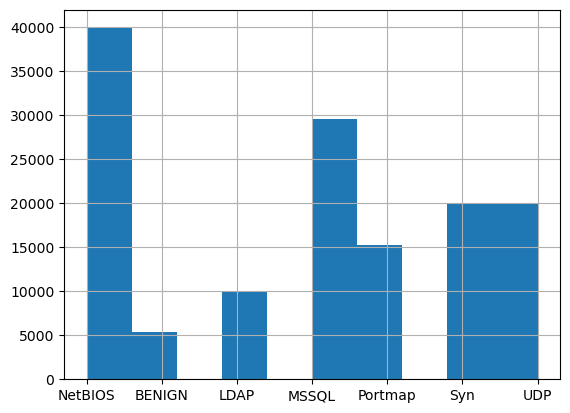

In [4]:
df['Label'] = df[' Label']
del df[' Label']
df.Label.hist()

In [5]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [6]:
from sklearn import preprocessing

#transform non-numerical labels to numerical labels
df['Label'] = df['Label'].astype(str)
df[' Flow Duration'] = df[' Flow Duration'].astype(int)
df['Total Length of Fwd Packets'] = df['Total Length of Fwd Packets'].astype(int)
df[' Fwd Packet Length Max'] = df[' Fwd Packet Length Max'].astype(int)
df[' Source Port'] = df[' Source Port'].astype(int)
df[' Destination Port'] = df[' Destination Port'].astype(int)
#df[' Flow Packets/s'] = df[' Flow Packets/s'].astype(int)

cols = ['Label', ' Flow Duration', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', 'Fwd Packets/s', ' Source Port', ' Destination Port']
X = df[cols]
original = pd.DataFrame(data=X, columns = ['Label'])
mask = X.isnull()
le = preprocessing.LabelEncoder()
data = X.apply(le.fit_transform)
data = data.where(~mask, original)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(data)
data = pd.DataFrame(imp_mean.transform(data), columns=data.columns)
data

C:\Users\chris\anaconda4\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


,Label,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packets/s,Source Port,Destination Port
0,3,1,107,69,17827,368,2345
1,3,48,118,74,17736,369,43961
2,3,1,111,71,17827,146,33271
3,3,1,111,71,17827,370,44384
4,3,1,111,71,17827,371,33264
...,...,...,...,...,...,...,...
139995,6,7946,633,133,10071,20658,42100
139996,6,2664,455,109,15341,23474,2729
139997,6,2,151,115,17822,35546,28007
139998,6,3702,455,109,14302,23472,20424


In [7]:
from sklearn.preprocessing import MinMaxScaler
for col in cols:
    if(col == "Label"):
        continue
        
    scaler = MinMaxScaler()
    scaler.fit(data[[col]])
    data[col] = scaler.transform(data[[col]])

In [8]:
data

,Label,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packets/s,Source Port,Destination Port
0,3,0.000057,0.094858,0.086683,0.999944,0.008721,0.043628
1,3,0.002714,0.104610,0.092965,0.994840,0.008745,0.817879
2,3,0.000057,0.098404,0.089196,0.999944,0.003460,0.618995
3,3,0.000057,0.098404,0.089196,0.999944,0.008768,0.825749
4,3,0.000057,0.098404,0.089196,0.999944,0.008792,0.618865
...,...,...,...,...,...,...,...
139995,6,0.449307,0.561170,0.167085,0.564898,0.489561,0.783256
139996,6,0.150636,0.403369,0.136935,0.860500,0.556295,0.050772
139997,6,0.000113,0.133865,0.144472,0.999663,0.842382,0.521060
139998,6,0.209330,0.403369,0.136935,0.802221,0.556248,0.379981


In [9]:
cols = [' Flow Duration', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', 'Fwd Packets/s', ' Source Port', ' Destination Port']
X = data[cols]
y = data['Label']

In [10]:
X

,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packets/s,Source Port,Destination Port
0,0.000057,0.094858,0.086683,0.999944,0.008721,0.043628
1,0.002714,0.104610,0.092965,0.994840,0.008745,0.817879
2,0.000057,0.098404,0.089196,0.999944,0.003460,0.618995
3,0.000057,0.098404,0.089196,0.999944,0.008768,0.825749
4,0.000057,0.098404,0.089196,0.999944,0.008792,0.618865
...,...,...,...,...,...,...
139995,0.449307,0.561170,0.167085,0.564898,0.489561,0.783256
139996,0.150636,0.403369,0.136935,0.860500,0.556295,0.050772
139997,0.000113,0.133865,0.144472,0.999663,0.842382,0.521060
139998,0.209330,0.403369,0.136935,0.802221,0.556248,0.379981


In [11]:
# Balancing Dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({3: 39957, 2: 29489, 5: 20000, 6: 19998, 4: 15285, 1: 9931, 0: 5340})
Counter({3: 39957, 0: 39957, 1: 39957, 2: 39957, 4: 39957, 5: 39957, 6: 39957})


## <center> Multi-Layer Perceptron Technique <center>

### <center> Train Test Split <center>

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.79953719
Iteration 2, loss = 0.45586223
Iteration 3, loss = 0.41770308
Iteration 4, loss = 0.40459895
Iteration 5, loss = 0.39771902
Iteration 6, loss = 0.39288595
Iteration 7, loss = 0.38933051
Iteration 8, loss = 0.38660783
Iteration 9, loss = 0.38344023
Iteration 10, loss = 0.38213242
Iteration 11, loss = 0.38202877
Iteration 12, loss = 0.38027343
Iteration 13, loss = 0.37823482
Iteration 14, loss = 0.37418014
Iteration 15, loss = 0.36725722
Iteration 16, loss = 0.36357574
Iteration 17, loss = 0.35969742
Iteration 18, loss = 0.35804188
Iteration 19, loss = 0.35819286
Iteration 20, loss = 0.35610446
Iteration 21, loss = 0.35628286
Iteration 22, loss = 0.35389094
Iteration 23, loss = 0.35100211
Iteration 24, loss = 0.34892479
Iteration 25, loss = 0.34732748
Iteration 26, loss = 0.34647145
Iteration 27, loss = 0.34457625
Iteration 28, loss = 0.34419745
Iteration 29, loss = 0.34218641
Iteration 30, loss = 0.34243423
Iteration 31, loss = 0.34126995
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [14]:
# Make prediction on test dataset
ypred = clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.8803588260148861

<AxesSubplot:>

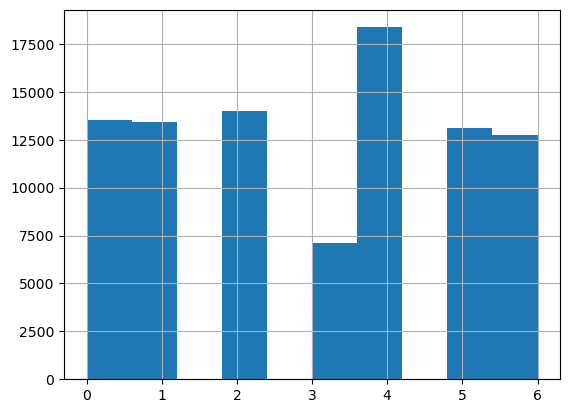

In [15]:
df = pd.DataFrame(ypred, columns=["prediction"])
df.prediction.hist()

In [16]:
ypred

array([3, 1, 6, ..., 5, 0, 0], dtype=int64)

In [17]:
y_test

10655     3
181076    1
278012    6
253630    5
230536    4
         ..
20953     1
168861    0
98075     5
143310    0
62955     0
Name: Label, Length: 92301, dtype: int64

### <center> Kfold <center>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)


scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(clf, X, y, cv=5)

Iteration 1, loss = 0.71742110
Iteration 2, loss = 0.50584921
Iteration 3, loss = 0.46051543
Iteration 4, loss = 0.42000864
Iteration 5, loss = 0.36525969
Iteration 6, loss = 0.33313763
Iteration 7, loss = 0.31665177
Iteration 8, loss = 0.30797119
Iteration 9, loss = 0.30354927
Iteration 10, loss = 0.30141629
Iteration 11, loss = 0.29701441
Iteration 12, loss = 0.29605045
Iteration 13, loss = 0.29471901
Iteration 14, loss = 0.29337567
Iteration 15, loss = 0.29351794
Iteration 16, loss = 0.29294821
Iteration 17, loss = 0.29120815
Iteration 18, loss = 0.28957273
Iteration 19, loss = 0.29017374
Iteration 20, loss = 0.28745857
Iteration 21, loss = 0.28649721
Iteration 22, loss = 0.28646826
Iteration 23, loss = 0.28549836
Iteration 24, loss = 0.28542714
Iteration 25, loss = 0.28421332
Iteration 26, loss = 0.28356804
Iteration 27, loss = 0.28128367
Iteration 28, loss = 0.27908915
Iteration 29, loss = 0.27752551
Iteration 30, loss = 0.27689330
Iteration 31, loss = 0.27601449
Iteration 32, los

Iteration 88, loss = 0.28690348
Iteration 89, loss = 0.28635817
Iteration 90, loss = 0.28683750
Iteration 91, loss = 0.28573778
Iteration 92, loss = 0.28645967
Iteration 93, loss = 0.28588703
Iteration 94, loss = 0.28716697
Iteration 95, loss = 0.28803948
Iteration 96, loss = 0.28593844
Iteration 97, loss = 0.28564699
Iteration 98, loss = 0.28571248
Iteration 99, loss = 0.28596896
Iteration 100, loss = 0.28610876
Iteration 101, loss = 0.28642118
Iteration 102, loss = 0.28603820
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66296322
Iteration 2, loss = 0.42229958
Iteration 3, loss = 0.40477314
Iteration 4, loss = 0.39449231
Iteration 5, loss = 0.38681197
Iteration 6, loss = 0.38250595
Iteration 7, loss = 0.37801625
Iteration 8, loss = 0.37411814
Iteration 9, loss = 0.37060978
Iteration 10, loss = 0.36661562
Iteration 11, loss = 0.36295463
Iteration 12, loss = 0.35659842
Iteration 13, loss = 0.34786607
Iteration 14, loss =

Iteration 60, loss = 0.30734589
Iteration 61, loss = 0.30694750
Iteration 62, loss = 0.30774980
Iteration 63, loss = 0.30673665
Iteration 64, loss = 0.30671244
Iteration 65, loss = 0.30776037
Iteration 66, loss = 0.30647895
Iteration 67, loss = 0.30713554
Iteration 68, loss = 0.30576521
Iteration 69, loss = 0.30694500
Iteration 70, loss = 0.30670244
Iteration 71, loss = 0.30601249
Iteration 72, loss = 0.30579828
Iteration 73, loss = 0.30573993
Iteration 74, loss = 0.30570414
Iteration 75, loss = 0.30619297
Iteration 76, loss = 0.30629408
Iteration 77, loss = 0.30672035
Iteration 78, loss = 0.30514726
Iteration 79, loss = 0.30565838
Iteration 80, loss = 0.30540238
Iteration 81, loss = 0.30544332
Iteration 82, loss = 0.30564695
Iteration 83, loss = 0.30516470
Iteration 84, loss = 0.30578610
Iteration 85, loss = 0.30502202
Iteration 86, loss = 0.30494489
Iteration 87, loss = 0.30487959
Iteration 88, loss = 0.30638541
Iteration 89, loss = 0.30490564
Iteration 90, loss = 0.30529454
Iteratio

In [19]:
results

{'fit_time': array([ 58.58107114,  50.2793622 ,  61.72965932, 125.64100647,
         80.3635149 ]),
 'score_time': array([0.0229404 , 0.02433443, 0.02407432, 0.02479744, 0.023067  ]),
 'test_score': array([0.80720415, 0.83108688, 0.88021094, 0.8435109 , 0.90498579])}

### <center> Support Vector Machine <center>

In [20]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [21]:
svm.support_vectors_

array([[1.63089545e-04, 0.00000000e+00, 0.00000000e+00, 9.99193441e-01,
        8.48118823e-05, 5.17032765e-01],
       [2.11774827e-02, 6.02836879e-02, 3.26633166e-02, 9.77800727e-01,
        8.71536954e-01, 6.54883721e-03],
       [7.51020353e-02, 1.77304965e-03, 2.51256281e-03, 8.85028998e-01,
        9.49619044e-01, 6.54883721e-03],
       ...,
       [5.65450947e-05, 1.53368794e-01, 1.75879397e-01, 9.99943908e-01,
        9.05372420e-01, 3.69116279e-02],
       [3.43067143e-03, 1.33865248e-01, 1.44472362e-01, 9.93432546e-01,
        8.30563676e-01, 3.55908031e-02],
       [5.65450947e-05, 1.53368794e-01, 1.75879397e-01, 9.99943908e-01,
        9.36867550e-01, 3.87441860e-01]])

In [22]:
ypred = svm.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.853273528997519

<AxesSubplot:>

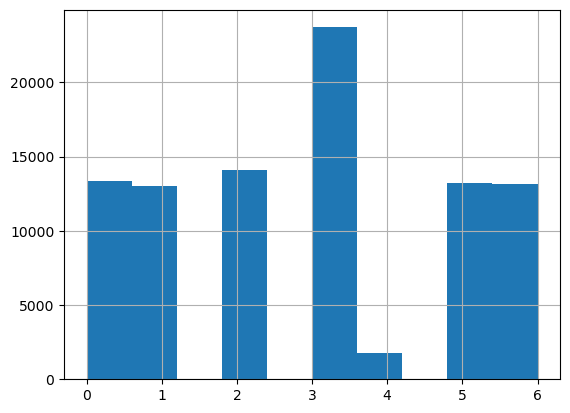

In [24]:
df = pd.DataFrame(ypred, columns=["prediction"])
df.prediction.hist()